In [20]:
from itertools import count
from functools import reduce
from math import sqrt

In [40]:
# http://stackoverflow.com/a/19578818/2597564
def factors(n):
        step = 2 if n%2 else 1
        return set(reduce(list.__add__,
                    ([i, n//i] for i in range(1, int(sqrt(n))+1, step) if n % i == 0)))

In [41]:
def multiples(n, max_num=100):
    output = set()
    i = 2
    while n*i <= max_num:
        output.add(n*i)
        i += 1
    return output

In [42]:
def destinations(n, max_num=100):
    return (multiples(n, max_num) | factors(n)) - {n}

In [61]:
def graph(max_num):
    return {i: destinations(i,max_num) for i in range(1,max_num+1)}

In [83]:
def longest_path_recurse(graph, visited_nodes, longest_path):
    if not visited_nodes:
        possible_nodes = set(graph.keys())
    else:
        if len(visited_nodes) > len(longest_path):
            longest_path = visited_nodes
        possible_nodes = graph[visited_nodes[-1]] - set(visited_nodes)
        
    for node in possible_nodes:
        longest_path = longest_path_recurse(graph, visited_nodes + (node,), longest_path)
    
    return longest_path    

In [100]:
paths = []
for n in range(5,30):
    g = graph(n)
    p = longest_path_recurse(g, tuple(), tuple())
    paths.append((n,p,len(p)))

In [101]:
from matplotlib import pyplot as plt

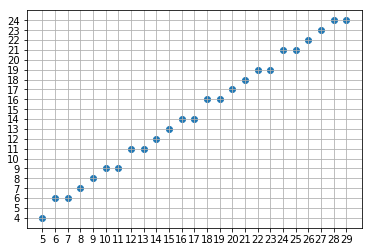

In [110]:
n,p,l = zip(*paths)
fig, ax = plt.subplots()
ax.scatter(n, l)
ax.grid(True)
plt.yticks(list(int(i) for i in range(min(l),max(l)+1)))
plt.xticks(list(int(i) for i in range(min(n),max(n)+1)))
plt.show()

https://oeis.org/A063208